<a href="https://colab.research.google.com/github/uumami/mhar_pytorch/blob/master/mst_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importo las librerias que usare en este notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("darkgrid")

In [14]:
# mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
mst = pd.read_csv('/content/drive/My Drive/mst_5000/mst_5000_heated.csv')
mst

,Unnamed: 0,figure,dim,z,p_value,nsamp,file,perm,seed
0,1,Simplex,50,-0.867691,0.156863,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,274861
1,2,Simplex,3,-2.003828,0.039216,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,6571864
2,3,Simplex,25,0.337674,0.627451,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,7872697
3,4,Simplex,15,-0.861907,0.254902,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,7402166
4,5,Hypercube,50,1.457169,0.960784,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,2105701
...,...,...,...,...,...,...,...,...,...
76,77,Hypercube,50,-0.989603,0.156863,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,3466060
77,78,Hypercube,3,0.767523,0.862745,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,3748783
78,79,Hypercube,25,0.021988,0.529412,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,8556326
79,80,Hypercube,15,0.388230,0.686275,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,2674389


In [16]:
mst.drop_duplicates('file').shape

(81, 9)

In [17]:
mst[mst['z']>-1.64]


,Unnamed: 0,figure,dim,z,p_value,nsamp,file,perm,seed
0,1,Simplex,50,-0.867691,0.156863,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,274861
2,3,Simplex,25,0.337674,0.627451,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,7872697
3,4,Simplex,15,-0.861907,0.254902,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,7402166
4,5,Hypercube,50,1.457169,0.960784,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,2105701
5,6,Hypercube,3,0.056991,0.568627,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,9206448
...,...,...,...,...,...,...,...,...,...
76,77,Hypercube,50,-0.989603,0.156863,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,3466060
77,78,Hypercube,3,0.767523,0.862745,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,3748783
78,79,Hypercube,25,0.021988,0.529412,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,8556326
79,80,Hypercube,15,0.388230,0.686275,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,2674389


In [18]:
mst = pd.read_csv('/content/drive/My Drive/mst_5000/mst_5000_initial.csv')
mst

,Unnamed: 0,figure,dim,z,p_value,nsamp,file,perm,seed
0,1,Hypercube,3,1.149749,0.862745,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,2347461
1,2,Hypercube,25,0.687476,0.745098,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,163777
2,3,Hypercube,15,-0.675153,0.196078,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,9901819
3,4,Simplex,50,1.546320,0.921569,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,505105
4,5,Simplex,3,0.587729,0.725490,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,5240173
...,...,...,...,...,...,...,...,...,...
79,80,Hypercube,50,2.900092,1.000000,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,280932
80,81,Hypercube,3,-0.735650,0.235294,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,4071449
81,82,Hypercube,25,-1.289624,0.117647,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,2120688
82,83,Hypercube,15,-1.551706,0.078431,5000,/content/drive/My Drive/mhar_paper_samples_2/1...,50,4589906


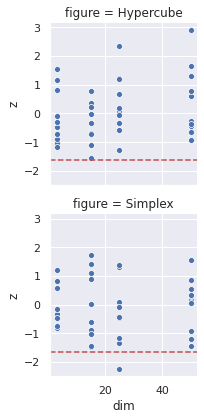

In [19]:

g = sns.FacetGrid(mst, row="figure")
g = g.map(sns.scatterplot, "dim", "z")

ax1, ax2 = g.axes

ax1[0].axhline(-1.64, ls='--', color='r')
ax2[0].axhline(-1.64, ls='--', color='r')

#ax1.text(0.5,25, "Some text")
#ax2.text(0.5,25, "Some text")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


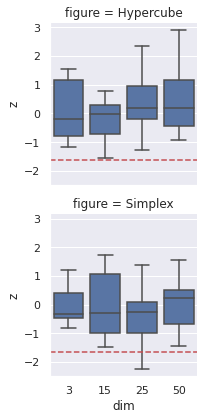

In [20]:
g = sns.FacetGrid(mst, row="figure")
g = g.map(sns.boxplot, "dim", "z")

ax1, ax2 = g.axes

ax1[0].axhline(-1.64, ls='--', color='r')
ax2[0].axhline(-1.64, ls='--', color='r')

#ax1.text(0.5,25, "Some text")
#ax2.text(0.5,25, "Some text")

plt.show()

In [21]:

mst.head(1)

,Unnamed: 0,figure,dim,z,p_value,nsamp,file,perm,seed
0,1,Hypercube,3,1.149749,0.862745,5000,/content/drive/My Drive/mhar_paper_samples_2/9...,50,2347461


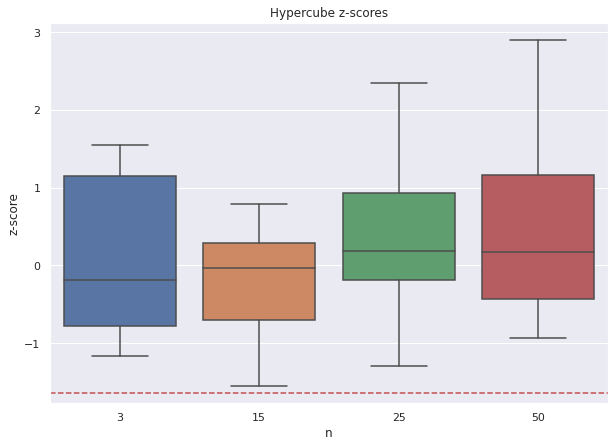

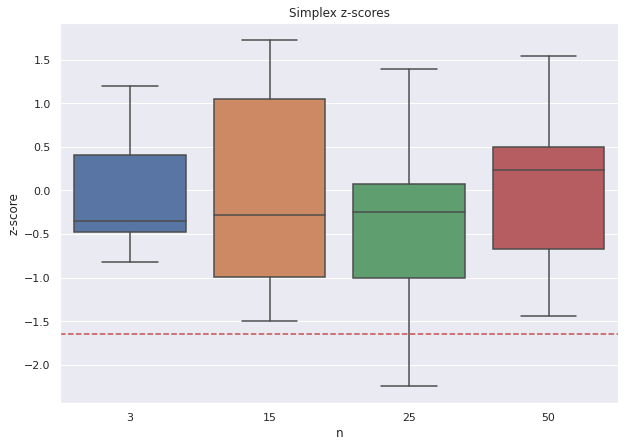

In [40]:
# Save individuall images 
mst_ = mst.copy()
mst_.rename(inplace=True, columns={'dim':'n', 'z':'z-score'})

for fig_ in mst_['figure'].unique():
  df_ = mst_[mst_['figure']==fig_]
  plt.figure(figsize=(10,7)) # Clean Plot
  g = sns.boxplot(data=df_, x='n', y='z-score')
  g.set_title(fig_.capitalize() + ' z-scores')
  g.axes.axhline(-1.64, ls='--', color='r')
  fig = g.get_figure()
  save_name = '/content/drive/My Drive/mhar_figures_mst/' + 'z_scores_boxplot_'+ fig_.lower() + '.png'
  fig.savefig(save_name)

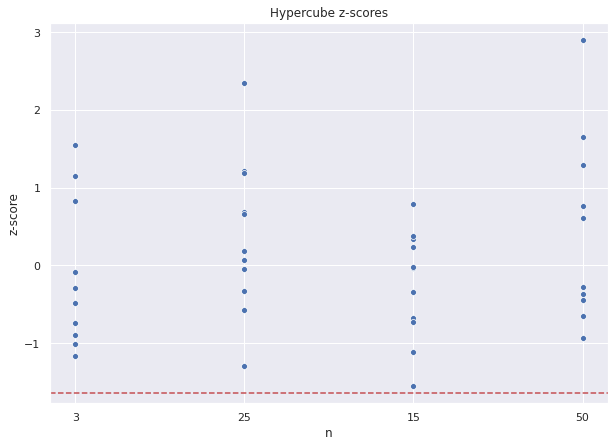

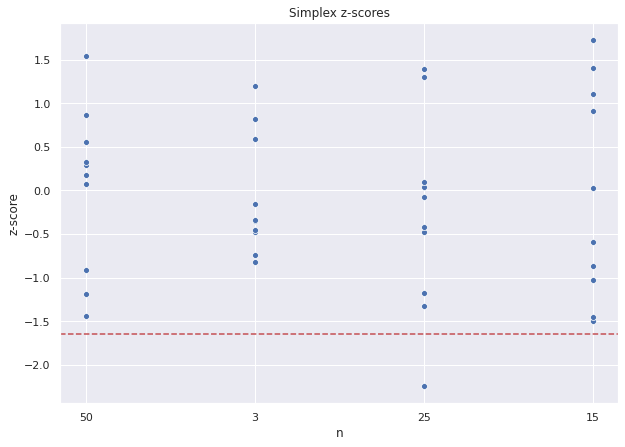

In [41]:
# Save individuall images 
mst_ = mst.copy()
mst_.rename(inplace=True, columns={'dim':'n', 'z':'z-score'})
mst_['n'] = mst_['n'].astype(str)
for fig_ in mst_['figure'].unique():
  df_ = mst_[mst_['figure']==fig_]
  plt.figure(figsize=(10,7)) # Clean Plot
  g = sns.scatterplot(data=df_, x='n', y='z-score')
  g.set_title(fig_.capitalize() + ' z-scores')
  g.axes.axhline(-1.64, ls='--', color='r')
  fig = g.get_figure()
  save_name = '/content/drive/My Drive/mhar_figures_mst/' + 'z_scores_scatter_'+ fig_.lower() + '.png'
  fig.savefig(save_name)